This notebook is to train ML models such as SVM and MLP. These models take graph embeddings generated using graph2vec (can be seen under './graph2vec/features/') as well as labels from retrieved balanced subsets in './Dataset/ '

## 1) Building and training a SVM 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import torch

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'], 'size'   : 24})
rc('text', usetex=True)

In [3]:
import matplotlib
matplotlib.font_manager._rebuild()


In [4]:
#get labels
data = pd.read_csv("./Dataset/vdisc_CWE_119.csv.gz")
#get embeddings 
x= pd.read_csv("./graph2vec/features/graphEmbedding_CWE_119.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48314 entries, 0 to 48313
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   48314 non-null  int64 
 1   testCase_ID  48314 non-null  int64 
 2   filename     48314 non-null  object
 3   code         48314 non-null  object
 4   bug          48314 non-null  bool  
 5   type         48314 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
y = data.iloc[:,4]

In [7]:
y_label = y.iloc[x['type']]

In [8]:
y_label.head()

0    True
1    True
2    True
3    True
4    True
Name: bug, dtype: bool

In [9]:
x = x.drop(columns="type")

In [10]:
x.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.051220,-0.216992,-0.152501,0.247652,0.135584,-0.262947,-0.278204,-0.158894,0.016377,0.237381,...,-0.003988,-0.130687,0.141232,0.116191,0.205981,0.213995,0.182009,-0.110658,0.202499,0.109361
1,0.066820,-0.218466,-0.060026,0.045488,0.187107,-0.010816,-0.087921,-0.160062,-0.091605,0.273527,...,-0.033533,-0.000664,0.041900,0.100901,0.046852,0.108185,0.150027,-0.131574,0.082503,0.089754
2,0.103285,-0.168562,-0.103039,0.162417,0.090237,-0.059107,-0.100139,-0.001984,0.010526,0.149694,...,-0.053034,-0.060630,0.086172,0.079937,0.072070,-0.050989,0.100983,-0.041862,0.102133,0.047535
3,0.087244,-0.106975,-0.086988,0.244181,0.092653,-0.063273,-0.399026,0.112895,-0.128767,0.284334,...,-0.032305,-0.052849,-0.005530,0.043033,0.027237,-0.042379,0.164617,-0.199720,0.180401,0.063029
4,0.119627,-0.135367,-0.178513,0.087210,0.135977,0.113927,-0.423829,-0.156658,-0.071054,0.285942,...,-0.001151,0.062458,0.188769,0.197469,0.165676,0.067458,0.054947,-0.160134,0.039492,-0.057761


Splitting up the dataset into 80% train and 10 % test subsets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size = 0.1, random_state = 42)

In [12]:
y_train.shape

(43482,)

In [13]:
y_test.shape

(4832,)

In [14]:
x_train.shape

(43482, 128)

Training a linear SVM with default parameters

In [15]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(x_train, y_train)

/home/feras/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
y_pred_svm=svm_clf.predict(x_test)

Plotting the cofusion matrix and performance metrics

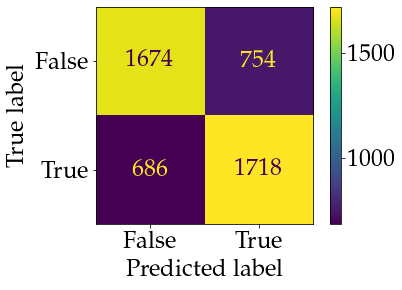

 Accuracy : 0.7019867549668874 
 Precision : 0.6949838187702265 
 Recall : 0.7146422628951747 
 F1 : 0.70467596390484 


In [17]:
confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(svm_clf, x_test, y_test)  
plt.show()
accuracy= accuracy_score(y_test, y_pred_svm)
precision= precision_score(y_test, y_pred_svm, zero_division=1)
recall= recall_score(y_test, y_pred_svm, zero_division=1)
F1= f1_score(y_test,y_pred_svm, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 : {3} ".format(accuracy, precision, recall,F1, ))

## 2) Implementing MLP

In [3]:
# Get labels
data = pd.read_csv("./Dataset/vdisc_CWE_119.csv.gz") 
#Get embeddings
x= pd.read_csv("./graph2vec/features/graphEmbedding_CWE_119.csv")

In [4]:
#convert true false values into integers
data["bug"] = data["bug"].astype(int)

In [5]:
data.head()

,Unnamed: 0,testCase_ID,filename,code,bug,type
0,0,0,0_vdisc.c,CDE_create_path_symlink_dirs() {\n char *p;\n...,1,CWE_119
1,1,1,1_vdisc.c,"gperror(unsigned int code,\n\t char *messa...",1,CWE_119
2,2,2,2_vdisc.c,test_date_rfc2822__format_rfc2822_positive_off...,1,CWE_119
3,3,3,3_vdisc.c,"toggle_cb (GtkWidget *item, char *pref_name)\n...",1,CWE_119
4,4,4,4_vdisc.c,"fixgrid34(NCDAPCOMMON* nccomm, CDFnode* grid)\...",1,CWE_119


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48314 entries, 0 to 48313
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   48314 non-null  int64 
 1   testCase_ID  48314 non-null  int64 
 2   filename     48314 non-null  object
 3   code         48314 non-null  object
 4   bug          48314 non-null  int64 
 5   type         48314 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [7]:
y = data.iloc[:,4]

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: bug, dtype: int64

In [9]:
x.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0,-0.051220,-0.216992,-0.152501,0.247652,0.135584,-0.262947,-0.278204,-0.158894,0.016377,...,-0.003988,-0.130687,0.141232,0.116191,0.205981,0.213995,0.182009,-0.110658,0.202499,0.109361
1,1,0.066820,-0.218466,-0.060026,0.045488,0.187107,-0.010816,-0.087921,-0.160062,-0.091605,...,-0.033533,-0.000664,0.041900,0.100901,0.046852,0.108185,0.150027,-0.131574,0.082503,0.089754
2,2,0.103285,-0.168562,-0.103039,0.162417,0.090237,-0.059107,-0.100139,-0.001984,0.010526,...,-0.053034,-0.060630,0.086172,0.079937,0.072070,-0.050989,0.100983,-0.041862,0.102133,0.047535
3,3,0.087244,-0.106975,-0.086988,0.244181,0.092653,-0.063273,-0.399026,0.112895,-0.128767,...,-0.032305,-0.052849,-0.005530,0.043033,0.027237,-0.042379,0.164617,-0.199720,0.180401,0.063029
4,4,0.119627,-0.135367,-0.178513,0.087210,0.135977,0.113927,-0.423829,-0.156658,-0.071054,...,-0.001151,0.062458,0.188769,0.197469,0.165676,0.067458,0.054947,-0.160134,0.039492,-0.057761


In [10]:
y_label = y.iloc[x['type']]

In [11]:
y_label.head()

0    1
1    1
2    1
3    1
4    1
Name: bug, dtype: int64

In [12]:
x = x.drop(columns="type")

In [13]:
x.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.051220,-0.216992,-0.152501,0.247652,0.135584,-0.262947,-0.278204,-0.158894,0.016377,0.237381,...,-0.003988,-0.130687,0.141232,0.116191,0.205981,0.213995,0.182009,-0.110658,0.202499,0.109361
1,0.066820,-0.218466,-0.060026,0.045488,0.187107,-0.010816,-0.087921,-0.160062,-0.091605,0.273527,...,-0.033533,-0.000664,0.041900,0.100901,0.046852,0.108185,0.150027,-0.131574,0.082503,0.089754
2,0.103285,-0.168562,-0.103039,0.162417,0.090237,-0.059107,-0.100139,-0.001984,0.010526,0.149694,...,-0.053034,-0.060630,0.086172,0.079937,0.072070,-0.050989,0.100983,-0.041862,0.102133,0.047535
3,0.087244,-0.106975,-0.086988,0.244181,0.092653,-0.063273,-0.399026,0.112895,-0.128767,0.284334,...,-0.032305,-0.052849,-0.005530,0.043033,0.027237,-0.042379,0.164617,-0.199720,0.180401,0.063029
4,0.119627,-0.135367,-0.178513,0.087210,0.135977,0.113927,-0.423829,-0.156658,-0.071054,0.285942,...,-0.001151,0.062458,0.188769,0.197469,0.165676,0.067458,0.054947,-0.160134,0.039492,-0.057761


In [14]:
dataset = x.join(y_label)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48314 entries, 0 to 48313
Columns: 129 entries, x_0 to bug
dtypes: float64(128), int64(1)
memory usage: 47.6 MB


In [16]:
dataset.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,bug
0,-0.051220,-0.216992,-0.152501,0.247652,0.135584,-0.262947,-0.278204,-0.158894,0.016377,0.237381,...,-0.130687,0.141232,0.116191,0.205981,0.213995,0.182009,-0.110658,0.202499,0.109361,1
1,0.066820,-0.218466,-0.060026,0.045488,0.187107,-0.010816,-0.087921,-0.160062,-0.091605,0.273527,...,-0.000664,0.041900,0.100901,0.046852,0.108185,0.150027,-0.131574,0.082503,0.089754,1
2,0.103285,-0.168562,-0.103039,0.162417,0.090237,-0.059107,-0.100139,-0.001984,0.010526,0.149694,...,-0.060630,0.086172,0.079937,0.072070,-0.050989,0.100983,-0.041862,0.102133,0.047535,1
3,0.087244,-0.106975,-0.086988,0.244181,0.092653,-0.063273,-0.399026,0.112895,-0.128767,0.284334,...,-0.052849,-0.005530,0.043033,0.027237,-0.042379,0.164617,-0.199720,0.180401,0.063029,1
4,0.119627,-0.135367,-0.178513,0.087210,0.135977,0.113927,-0.423829,-0.156658,-0.071054,0.285942,...,0.062458,0.188769,0.197469,0.165676,0.067458,0.054947,-0.160134,0.039492,-0.057761,1


In [17]:
example= dataset.loc[0]
print(example.bug)

1.0


In [18]:
#X=dataset[dataset.columns[0:127]]
y=dataset['bug']

Splitting up the datset into 80% training, 10% validation, and 10% test subsets

In [19]:
 x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1)
 x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [20]:
len(x_train)

28988

In [21]:
len(x_val)

9663

In [22]:
len(x_test)

9663

converting to tensors

In [23]:
x_train_tensors = torch.FloatTensor(x_train.values)
x_test_tensors = torch.FloatTensor(x_test.values)
x_val_tensors = torch.FloatTensor(x_val.values)

In [24]:
ex1= x_train_tensors[0]
print(ex1)

tensor([ 0.0916, -0.1638, -0.0159,  0.0503,  0.0561, -0.0112, -0.0557, -0.0302,
        -0.0244,  0.1812, -0.0251, -0.0938, -0.0660, -0.0697, -0.0267, -0.0160,
        -0.0280,  0.0149,  0.0143, -0.0034, -0.0457, -0.0032, -0.0724, -0.0131,
        -0.0067, -0.0024,  0.0008,  0.1327,  0.0510,  0.0961, -0.0868, -0.1005,
        -0.0455,  0.1511,  0.0754, -0.0983, -0.0137, -0.0100,  0.0691, -0.0135,
        -0.0490, -0.0079, -0.0567, -0.0672,  0.0252,  0.1045,  0.1184, -0.0089,
        -0.0381, -0.0302,  0.0777,  0.1203, -0.0566,  0.0178,  0.0896, -0.0478,
        -0.1588,  0.0624,  0.0388, -0.0321,  0.0023,  0.1453, -0.0303,  0.1105,
         0.1054, -0.0268, -0.0152,  0.0093,  0.0685, -0.0968,  0.0947, -0.0015,
        -0.0661, -0.0346, -0.0391, -0.0421, -0.0068, -0.0893,  0.0019, -0.0879,
        -0.1601, -0.0044, -0.0194, -0.0117, -0.0821, -0.0081, -0.0723,  0.0589,
         0.0854, -0.0104,  0.0608,  0.0433, -0.0659, -0.0312,  0.0607, -0.0231,
         0.0162,  0.0785,  0.0145,  0.06

In [25]:
y_train_tensors = torch.tensor(y_train.values)
y_test_tensors = torch.tensor(y_test.values)
y_val_tensors = torch.tensor(y_val.values)

In [26]:
ex1= y_test_tensors[775]
print(ex1)

tensor(1)


The MLP model 

In [27]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [28]:
model = MLP()
print(model)
#print("Number of parameters: ", sum(p.numel() for p in model.parameters())) 

MLP(
  (layers): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = torch.nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Printing out the loss before starting training to see the difference

In [30]:
model.eval()
y_pred = model(x_test_tensors)
before_train = criterion(y_pred.squeeze(), y_test_tensors.float())
print('Test loss before training' , before_train.item())

Test loss before training 0.6935989260673523


Training the model

In [31]:
def train():
    model.train()

    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train_tensors)    
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_tensors.float())
    # Backward pass
    loss.backward()
    optimizer.step()

    return loss

In [32]:
def evaluate(x_tensors, y_tensors):
    model.eval()
    y_pred = model(x_tensors)
    loss  = criterion(y_pred.squeeze(), y_tensors.float()) 
    return accuracy_score(y_tensors.detach().cpu().numpy(), np.rint(y_pred.cpu().detach().numpy())), loss

In [33]:
print("Starting training...")
train_losses = []
val_losses = []
val_acc_list= []
train_acc_list= []
mean_train_losses = []
mean_val_losses = []
best_loss = 1000
early_stopping_counter = 0
for epoch in range(200):
    if early_stopping_counter <= 5: 
        loss = train()
        train_losses.append(loss)
        train_acc, train_loss = evaluate(x_train_tensors, y_train_tensors)   
        val_acc, val_loss = evaluate(x_val_tensors, y_val_tensors)
        val_losses.append(val_loss)
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        #mean_train_losses.append(np.mean(train_losses))
        #mean_val_losses.append(np.mean(val_losses))
        if float(val_loss) < best_loss:
            best_loss = val_loss
            # Save the currently best model 
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
        print(f"Epoch {epoch} | Train Loss {loss} | Train Accuracy{train_acc} | Validation Accuracy{val_acc} | Validation loss{best_loss}")

    else:
        print("Early stopping due to no improvement.")
        break
print(f"Finishing training with best validation loss: {best_loss}")

Starting training...
Epoch 0 | Train Loss 0.6939480900764465 | Train Accuracy0.49813716020422244 | Validation Accuracy0.5012935941219083 | Validation loss0.6795520782470703
Epoch 1 | Train Loss 0.6809227466583252 | Train Accuracy0.6810749275562301 | Validation Accuracy0.683535134016351 | Validation loss0.6523000001907349
Epoch 2 | Train Loss 0.6542342901229858 | Train Accuracy0.6896301918035049 | Validation Accuracy0.6914001862775535 | Validation loss0.6208293437957764
Epoch 3 | Train Loss 0.6240034699440002 | Train Accuracy0.6910790672002208 | Validation Accuracy0.6942978371106282 | Validation loss0.5984110832214355
Epoch 4 | Train Loss 0.6029455065727234 | Train Accuracy0.6771422657651442 | Validation Accuracy0.6780502949394598 | Validation loss0.5984110832214355
Epoch 5 | Train Loss 0.6070099472999573 | Train Accuracy0.6940113150269077 | Validation Accuracy0.6912966987478009 | Validation loss0.5984110832214355
Epoch 6 | Train Loss 0.6581171751022339 | Train Accuracy0.678936111494411

Plotting learning curves

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


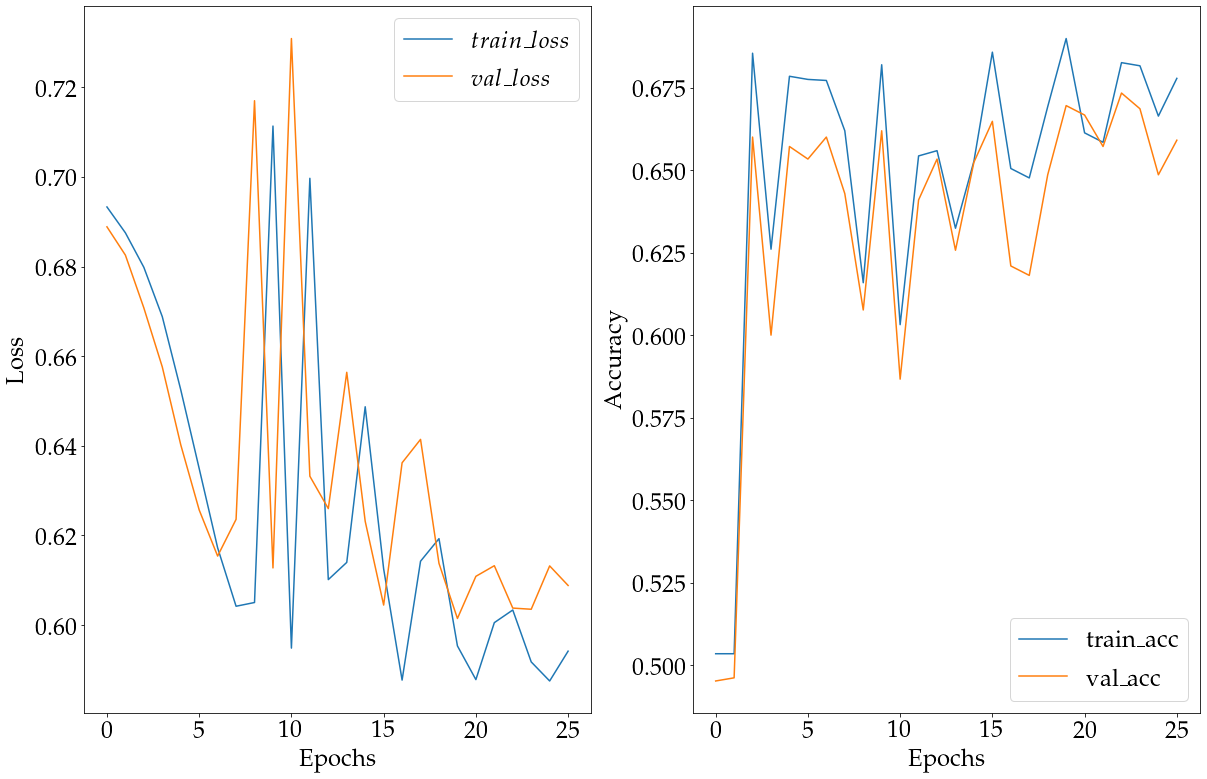

In [40]:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Computer Modern Roman"],
#})
with torch.no_grad():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 13))
    ax1.plot(train_losses, label="$train\_loss$")
    ax1.plot(val_losses, label="$val\_loss$")
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epochs')
    lines, labels = ax1.get_legend_handles_labels()
    ax1.legend(lines, labels, loc='best')

    ax2.plot(train_acc_list, label='train\_acc')
    ax2.plot(val_acc_list, label='val\_acc')
    ax2.legend()
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epochs')
    #plt.rc('font', family='serif)
    plt.savefig('CWE_469_losses_test.png')

In [34]:
# Analyze the results
test_batch = next(iter(x_test_tensors))
with torch.no_grad():
    y_pred = model(x_test_tensors) 
    df = pd.DataFrame()
    df["y_pred"] = y_pred.tolist()
df

,y_pred
0,[0.9125254154205322]
1,[0.2667907476425171]
2,[0.554583728313446]
3,[0.5940422415733337]
4,[0.38740089535713196]
...,...
9658,[0.08703138679265976]
9659,[0.6761210560798645]
9660,[0.9424304962158203]
9661,[0.0559699684381485]


In [35]:
df["y_real"] = y_test_tensors.tolist()

In [36]:
df

,y_pred,y_real
0,[0.9125254154205322],1
1,[0.2667907476425171],1
2,[0.554583728313446],1
3,[0.5940422415733337],1
4,[0.38740089535713196],1
...,...,...
9658,[0.08703138679265976],0
9659,[0.6761210560798645],0
9660,[0.9424304962158203],1
9661,[0.0559699684381485],0


printing out the performance measures 

In [37]:
# y_test = y_test_tensors.detach().cpu().numpy()
y_pred = np.rint(y_pred)
# confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(model, x_test_tensors, y_test_tensors)  
# plt.show()
accuracy= accuracy_score(y_test_tensors, y_pred)
precision= precision_score(y_test_tensors, y_pred, zero_division=1)
recall= recall_score(y_test_tensors, y_pred, zero_division=1)
F1= f1_score(y_test_tensors,y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 : {3}".format(accuracy, precision, recall, F1))

 Accuracy : 0.721204594846321 
 Precision : 0.7130842949344808 
 Recall : 0.7482043915452493 
 F1 : 0.7302223112357301


In [39]:
model.eval()
y_pred = model(x_test_tensors)
after_train = criterion(y_pred.squeeze(), y_test_tensors.float())
print('Test loss after training' , after_train.item())

Test loss after training 0.619390606880188
